# Import necessary packages

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imutils import paths
from scipy import misc
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os
import warnings
warnings.filterwarnings("ignore")
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 20
BS = 8

C:\Users\Riddhi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Reading Image Paths

In [2]:
imagePaths = list(paths.list_images("D:/RIDDHI MEHTA/MPSTME/Third Year/Semester VI/Predictive Modelling/Project/keras-covid-19/dataset"))

In [3]:
imagePaths

['D:/RIDDHI MEHTA/MPSTME/Third Year/Semester VI/Predictive Modelling/Project/keras-covid-19/dataset\\covid\\1-s2.0-S0140673620303706-fx1_lrg.jpg',
 'D:/RIDDHI MEHTA/MPSTME/Third Year/Semester VI/Predictive Modelling/Project/keras-covid-19/dataset\\covid\\1-s2.0-S0929664620300449-gr2_lrg-a.jpg',
 'D:/RIDDHI MEHTA/MPSTME/Third Year/Semester VI/Predictive Modelling/Project/keras-covid-19/dataset\\covid\\1-s2.0-S0929664620300449-gr2_lrg-b.jpg',
 'D:/RIDDHI MEHTA/MPSTME/Third Year/Semester VI/Predictive Modelling/Project/keras-covid-19/dataset\\covid\\1-s2.0-S0929664620300449-gr2_lrg-c.jpg',
 'D:/RIDDHI MEHTA/MPSTME/Third Year/Semester VI/Predictive Modelling/Project/keras-covid-19/dataset\\covid\\1-s2.0-S0929664620300449-gr2_lrg-d.jpg',
 'D:/RIDDHI MEHTA/MPSTME/Third Year/Semester VI/Predictive Modelling/Project/keras-covid-19/dataset\\covid\\auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'D:/RIDDHI MEHTA/MPSTME/Third Year/Semester VI/Predictive Modelling/Project

# Machine Learning

## Reading Images and Pre-processing

In [4]:
def machine_learning(paths):
    
    data_ml = pd.DataFrame()
    labels = []
    
    imagePaths = paths
    
    for imagePath in imagePaths:
        
        label = imagePath.split('\\')[-2]
        image = pd.DataFrame(misc.imresize(cv2.cvtColor(cv2.imread(imagePath),cv2.COLOR_BGR2GRAY),(224,224)).reshape(1,-1))

        data_ml = pd.concat([data_ml, image])
        labels.append(label)
          
    data_ml = StandardScaler().fit_transform(data_ml) 
    pca = PCA(n_components=50)
    data_ml = pca.fit_transform(data_ml)
    data_ml = pd.DataFrame(data_ml)
    
    labels = list(labels)
    data_ml["label"] = labels
    data_ml["label"] = LabelEncoder().fit_transform(data_ml["label"])
    
    
    return data_ml

data_ml = machine_learning(imagePaths)

## Train Test Split

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(data_ml.iloc[:,:-1], data_ml["label"], 
                                                    test_size=0.20, stratify=data_ml["label"], random_state=42)

## Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(X_train, Y_train)
Y_pred = logr.predict(X_test)

In [7]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## Support Vector Classification

In [8]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

In [9]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.56      1.00      0.71         5

    accuracy                           0.60        10
   macro avg       0.78      0.60      0.52        10
weighted avg       0.78      0.60      0.52        10



## Decision Trees Classification

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
Y_pred = dtc.predict(X_test)

In [11]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.71      1.00      0.83         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



## Random Forests 

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)

In [13]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## Summary of all Machine Learning alogrithms

In [14]:
name = ["Logistic Regression","Support Vector Classifier","Decision Tree Classifier","Random Forests Classifier"]
train_acc = [logr.score(X_train, Y_train),svc.score(X_train, Y_train),dtc.score(X_train, Y_train),rfc.score(X_train, Y_train)]
test_acc = [logr.score(X_test, Y_test),svc.score(X_test, Y_test),dtc.score(X_test, Y_test),rfc.score(X_test, Y_test)]
summary = pd.DataFrame()
summary["name"] = name
summary["train_acc"] = train_acc
summary["test_acc"] = test_acc
summary

,name,train_acc,test_acc
0,Logistic Regression,1.0,1.0
1,Support Vector Classifier,1.0,0.6
2,Decision Tree Classifier,1.0,0.8
3,Random Forests Classifier,1.0,1.0


# DEEP LEARNING

## Reading Images and Pre-Processing

In [15]:
def deep_learning(paths):
    
    data_dl = []
    labels = []
    
    imagePaths = paths
    
    for imagePath in imagePaths:
        
        label = imagePath.split('\\')[-2]
        image = cv2.imread(imagePath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        
        data_dl.append(image)
        labels.append(label)
        
    data_dl = np.array(data_dl) / 255.0
    labels = np.array(labels)
    
    return data_dl, labels

data_dl, labels = deep_learning(imagePaths)

## Train Test Split

In [16]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
X_train, X_test, Y_train, Y_test = train_test_split(data_dl, labels, test_size=0.20, stratify=labels, random_state=42)

## CNN

In [17]:
baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

In [18]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [19]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [20]:
for layer in baseModel.layers:
    layer.trainable = False

In [21]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [22]:
trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")

In [23]:
H = model.fit_generator(trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

Epoch 1/20
5/5 [==============================] - 29s 6s/step - loss: 0.8508 - acc: 0.4750 - val_loss: 0.7270 - val_acc: 0.5000
Epoch 2/20
5/5 [==============================] - 26s 5s/step - loss: 0.7690 - acc: 0.5250 - val_loss: 0.6960 - val_acc: 0.4000
Epoch 3/20
5/5 [==============================] - 26s 5s/step - loss: 0.6225 - acc: 0.6500 - val_loss: 0.6729 - val_acc: 0.4000
Epoch 4/20
5/5 [==============================] - 25s 5s/step - loss: 0.6979 - acc: 0.6000 - val_loss: 0.6518 - val_acc: 0.8000
Epoch 5/20
5/5 [==============================] - 25s 5s/step - loss: 0.6958 - acc: 0.6250 - val_loss: 0.6406 - val_acc: 0.7000
Epoch 6/20
5/5 [==============================] - 25s 5s/step - loss: 0.6325 - acc: 0.6250 - val_loss: 0.6098 - val_acc: 0.8000
Epoch 7/20
5/5 [==============================] - 27s 5s/step - loss: 0.5339 - acc: 0.8000 - val_loss: 0.5964 - val_acc: 0.8000
Epoch 8/20
5/5 [==============================] - 28s 6s/step - loss: 0.5213 - acc: 0.7500 - val_loss: 0

In [24]:
predIdxs = model.predict(X_test, batch_size=BS)

In [25]:
print(classification_report(Y_test.argmax(axis = 1), predIdxs.argmax(axis = 1), target_names=lb.classes_))

              precision    recall  f1-score   support

       covid       0.83      1.00      0.91         5
      normal       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



In [26]:
cm = confusion_matrix(Y_test.argmax(axis=1), predIdxs.argmax(axis = 1))
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("accuracy: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[5 0]
 [1 4]]
accuracy: 0.9000
sensitivity: 1.0000
specificity: 0.8000


## Accuracy and Loss Plots

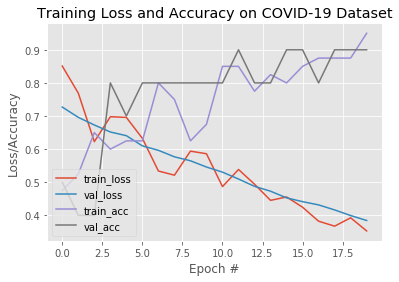

In [27]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

# THE END